# Learning with Imbalanced Data

Imbalanced data is the case when classes have unequal numbers of samples. There's no standard of the exact degree of imbalancing, but as general rule, when the most common class is less than 1:2 as the rarest class, this would be only marginally unbalanced. Nevertheless, higher ratios such as 10:1 are already modestly imbalanced, whereas ratios above 1000:1 are extremely unbalanced. But the most important thing is how imbalance affects learning.

Costs of errors (cost functions) are often asymmetric and quite skewed (e.g. imbalance ratio 10:1 often has higher errors than 3:1), violating the assumption that they are uniform and thus only accuracy shold be optimized. Added to that, using accuracy as a metric of evaluation with imbalanced often has the impact of poor minority class performance traded-oof for improved majority class performance [[1]](https://www.wiley.com/en-us/Imbalanced+Learning%3A+Foundations%2C+Algorithms%2C+and+Applications-p-9781118074626). 

Here we'll take the [accuracy paradox](https://en.wikipedia.org/wiki/Accuracy_paradox) to exemplify how this can be an issue. A simple model may have a high level of accuracy but be too crude to be useful i.e. taking Class A with 99% of samples, predicting every case is Class A results in 99% of accuracy, which in this case does not reflect variance of Classes or nothing else but the underlying Class distribution.

Generally, we have three main issues with learning from imbalanced data:
1. **Problem issues:** happens when there's insufficient information to define the problem in a proper way, e.g. when there's no way to evaluate the learned knowledge;
2. **Data issues:** when there's not sufficient samples from on one or more classes to learn the rarities effectively (absolute rarity);
3. **Algorithm issues:** inadequacies in the algorithms which makes it learn poorly when imbalanced data exists.

Nevertheless, as [[1]](https://www.wiley.com/en-us/Imbalanced+Learning%3A+Foundations%2C+Algorithms%2C+and+Applications-p-9781118074626) proposes, class imbalances, i.e. relative differences in class proportions, is not fundamentally a problem at the data level, but rather a data distribution problem. So relative rarity remais as a problem formulation or algorithmic limitation issue. So the key here is that *imbalanced data is a problem only because learning algorithms cannot effectively handle this kind of data*.

So let's talk now how can one address those issues presented earlier:
1. *Problem issues*:
    - Use *appropriate evaluation metrics*, which means *changing the focus from accuracy oriented* only. Some other common metrics to be used are *Receiver Operation Characteristics (ROC)* (it does not have bias towards models that perform well on the majority class at expense of the majority class, as commented above on the accuracy paradox), and *precision and recall*, where recall is usually more used to assess the coverage of the minority class.
    - *Redefine the problem*, finding a subdomais where data is less imbalanced, but the subdomain is still of sufficient interest.
    
    
2. *Data issues*:
    - to deal with absolute rarity, the best approach would be acquire additional labeled data, preferentially from the rare classes or cases, which is not an easy work.
    - sampling methods, which are primarily used to address the problem with relative rarity, but do not address the problem with absolute rarity, so they just reducte between-class imbalance.
    
    
3. *Algorithm issues*:
    - use search methods that avoid greed and recursive partitioning (divide-and-conquer), since they have difficulty in finding rare patterns. One possibility is genetic algorithms;
    - Using search methods that involves evaluating metrics that properly value the learning, such as F-measure;
    - Using algorithms that implicitily of explicitily favor rare classes and cases, e.g. boosting in Adacost or SMOTEBoost;
    - Useing algorithms that learn only the rare class;

Let's just again make some distiction between *absolute rarity and relative rarity* [[2]](https://www.researchgate.net/publication/283282940_Rare_events_and_imbalanced_datasets_an_overview):
- Absolute rarity = lack of data: number of examples associated with the minority class is small in the absolute sense, so it's impossible to lear the decision boundaries associated with that class;
- Relative rarity = relative lack of data:  sometimes rare events or minority classes are not rare in the absolute sense, but they are rare relative to other events or classes, which makes it difficult to detect patterns associated with rare events or classes

Let's take this by examples. In the first case, consider that we have certain cancer data with 100 samples, and the minority class, let's say cancer = exists has a ratio of 5:100. Here the minority class is small in the absolute sense.
Now consider again a cancer dataset with 10,000 samples and same ratio. Here, the majority outnumbers the minority class, even though now 500 samples may not be considered rare.


So now that we have an idea of *what's imblanaced data*, let's check out some data sampling methods that try to overcome this issue! For that, we'll use the [Estonia ferry disaster](https://www.kaggle.com/christianlillelund/passenger-list-for-the-estonia-ferry-disaster) dataset from Kaggle, which is composed by:

- Country
- Firstname
- Lastname
- Sex
- Age
- Category
- Survived

PS: Here we'll cover sampling techniques only, not machine learning algorithms.

# 1. Import Data

In [213]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline

warnings.filterwarnings('ignore')

In [214]:
df = pd.read_csv('estonia-passenger-list.csv')

In [215]:
df.shape

(989, 8)

In [216]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


# 2. Initial Data Analysis

1. *Data cleaning* is the identification of inconsistencies in the data and the resolution of any such issues.

2. *Data screening* is the description of the data properties.

3. *Documentation and reporting* preserve the information for the later statistical analysis and models.

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [218]:
df.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

## 2.1. Quantitative Data

Only quantitative attribute are Age, which is symmetric (skew app. zero) and has a high pick (negative and close to -1 kurtosis), with no outliers

In [219]:
df['Age'].describe()

count    989.000000
mean      44.575329
std       17.235146
min        0.000000
25%       30.000000
50%       44.000000
75%       59.000000
max       87.000000
Name: Age, dtype: float64

In [220]:
print('Age skew = %s and kurtosis = %s' % (df['Age'].skew(), df['Age'].kurtosis()))

Age skew = 0.06792986904254292 and kurtosis = -0.9356678278025496


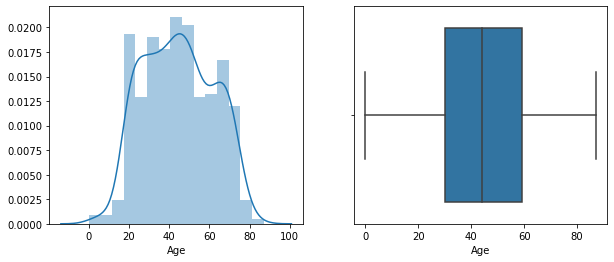

In [221]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
sns.distplot(df['Age'], ax=ax1) # KDE symmetric 
sns.boxplot(df['Age'], ax=ax2);

## 2.2. Qualitative Data

For qualitative data, we should treat the attributes individually.
As we follow down this path, we notice that several attributes such as Country, Category, and Survived (target) are **imbalanced**, so we must take action over this.

In [222]:
df.describe(include=['O'])

,Country,Firstname,Lastname,Sex,Category
count,989,989,989,989,989
unique,16,849,774,2,2
top,Sweden,ANDRES,ANDERSSON,M,P
freq,550,8,15,503,796


1. Country:
    - imbalanced class, with Sweden happening 550 times (55%), followed by Estonia with 344 (35%)
    - consider creating a new feature from this imbalancing, grouping other countries.

In [223]:
df['Country'].value_counts()

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Netherlands        2
Great Britain      2
Morocco            2
France             1
Belarus            1
Nigeria            1
Canada             1
Name: Country, dtype: int64

In [224]:
df.loc[(df['Country'] != "Sweden") & (df['Country'] != "Estonia"), "Country"] = "Others"

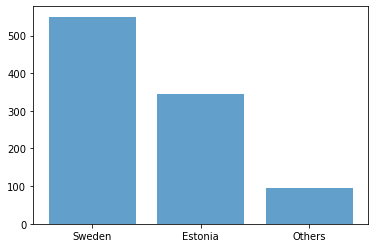

In [225]:
plt.bar(df['Country'].unique(), df['Country'].value_counts(), alpha=.7);

2. Names
    - Firstname
        - has several different names an ten most common account for only 60 samples
        - maybe consider establish a string relation
    - Lastname
        - has several different names and ten most common account for only 164 samples
        - also consider string relation

In [226]:
df['Firstname'].unique()

array(['ARVID KALLE', 'LEA', 'AIRI', 'JURI', 'BRITTA ELISABET',
       'GERD INGA MAGNHILD', 'HJALMAR', 'PILLE', 'TORMI', 'ANNA MARIA',
       'LARS BERTIL', 'NELLI', 'URMAS', 'TAMARA', 'KATRIN', 'LINE',
       'ARMIDO', 'BENGT SOLVE INGEMAR', 'GUN DAGMAR INGEGERD',
       'CARL OLOF INGVAR', 'HJORDIS IRENE', 'PAUL', 'AGNE KARL ARVID',
       'ANNA LENA', 'INGRID VIOLA AMALIA', 'IRIS VIKTORIA', 'JILL MARIA',
       'KAJ OLAV ARTHUR', 'KARL ERIK', 'LARS MAGNUS', 'MONICA INGEGERD',
       'PER ALBERT', 'RUT INGEGERD', 'RUTH INGER', 'ULLA GUNVOR LINNEA',
       'VIVI INGEBORG MARIANN', 'AKE HILMER', 'NIKOLAJS', 'ARVO', 'ALLA',
       'LEMBIT', 'EVI', 'EVALD VALTER', 'KARIN CECILIA', 'ANTI', 'TIINA',
       'ALEKSEI GRIGORY', 'ULLE', 'JANNO', 'EWA MARGARETHA',
       'ANN-CHARLOTTE CARLSDOTT', 'BENGT GUNNAR', 'STINA ASTRID MATILDA',
       'DAGNY MARGARETA', 'INGEGERD', 'HERBERT', 'URVE', 'RAIVO',
       'RAIMO JOHANNES', 'ANDRES', 'TUULA ANNELI', 'CARITA CHARLOTH',
       'EVA LOUISE', 'H

In [227]:
df['Firstname'].value_counts()[:10]

ANDRES    8
TIINA     8
RAIVO     8
KATRIN    6
PAUL      6
PEETER    6
ULLE      5
ANDRUS    5
JANIS     4
KALEV     4
Name: Firstname, dtype: int64

In [228]:
df['Lastname'].unique()

array(['AADLI', 'AALISTE', 'AAVASTE', 'AAVIK', 'AHLSTROM', 'AHMAN',
       'AINSALU', 'ALDRIN', 'ALEKSEEVA', 'ALENDER', 'ALEP', 'ALLA',
       'ALLAS', 'ALM', 'ALMQUIST', 'ANDERLJUNG', 'ANDERSON', 'ANDERSSON',
       'ANDREJEVS', 'ANDRESSON', 'ANNUS', 'ANTUK', 'APELMAN', 'ARAK',
       'ARRO', 'ARTJUHHOV', 'ARULA', 'ASER', 'ASKERUP', 'ASPLUND',
       'ASPMAN', 'ATTERFORS', 'JATTERFORS', 'AUGUSTIN', 'AUN', 'AUSMEES',
       'AUVINEN', 'AVEKUKK', 'AXELSSON', 'BARASINSKI', 'BARNEY',
       'BEKKEWOLD', 'BELZETSKAJA', 'BEN HAMOU', 'BEN TOUNSI', 'BERENDSEN',
       'BERG', 'BERGENDAHL', 'BERGENHEIM', 'BERGKVIST', 'ERGQVIST',
       'ERGOVIST', 'BERGSMARK', 'BERLIN', 'BERNANS', 'BERNERVALL',
       'BERNOVICS', 'BIELIS', 'BIRSANE', 'BLIXT', 'BLOMQVIST-SPAGNOLO',
       'BLUMFELTH', 'BODIN', 'BOGDANOV', 'BOGREN', 'BOIWE', 'BORGH',
       'BOJE', 'BRANDSTETTER', 'BRIDET', 'BROMANDER',
       'BRYGGMAN SMEDENBORN', 'BRANDSTROM', 'BURAKOVA', 'BUREVIK',
       'BURMAN', 'BYLUND', 'BOTKER', 'CALA

In [229]:
df['Lastname'].value_counts()[:10]

ANDERSSON     15
NILSSON       12
ERIKSSON      11
KARLSSON       9
JOHANSSON      9
SVENSSON       8
PERSSON        8
GUSTAFSSON     8
JONSSON        6
PETTERSSON     6
Name: Lastname, dtype: int64

3. Sex
    - binary
    - balanced class

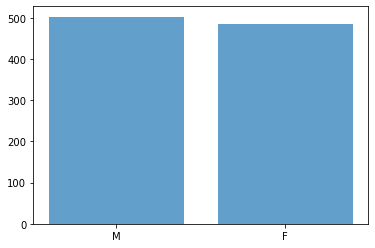

In [230]:
plt.bar(df['Sex'].unique(), df['Sex'].value_counts(), alpha=.7);

4. Category
    - binary
    - imbalanced

In [231]:
df['Category'].unique()

array(['P', 'C'], dtype=object)

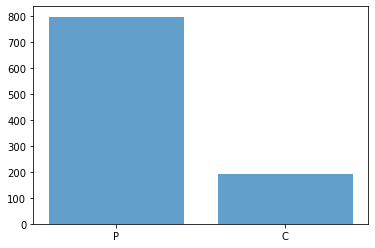

In [232]:
plt.bar(df['Category'].unique(), df['Category'].value_counts(), alpha=0.7);

In [233]:
df['Category'] = df['Category'].map({'P':0, 'C':1})

5. Survived
    - target attribute
    - binary
    - imbalanced

In [234]:
df['Survived'].value_counts()

0    852
1    137
Name: Survived, dtype: int64

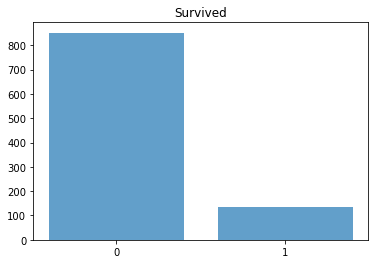

In [235]:
plt.bar(df['Survived'].unique(), df['Survived'].value_counts(), alpha=0.7)
plt.title('Survived')
plt.xticks(df['Survived'].unique());

# 3. Working with Imbalanced Classes

Imbalanced data refers to a problem with classification where classes are not represented equally. As in the attributes above, taking the target for this example, we have 852 samples of Class 0 and 137 samples of Class 1, which results in a ratio of 6:1, and this can cause some troube.

So here we'll try to see some approaches to strive with imbalanced data through **resampling**.
Resampling basically involves creating a new transformed version of the training dataset with different class distribution, and in this case, randomly.

Here we'll use the *imblearn* library [[3]](https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html), a specific library used for dealing with imbalanced classes.

In [236]:
# before we go ahead, let's split our dataset in predictors and target
# to check how the techniques change it
X = df.drop('Survived', axis=1)
y = df['Survived']

In [237]:
X.shape, y.shape

((989, 7), (989,))

In [238]:
y.value_counts()

0    852
1    137
Name: Survived, dtype: int64

## 3.1. Oversampling

Oversampling methods duplicate examples in the minority class or synthesize new examples from the examples in the minority class. Some of the techniques that will be covered here are [[4]](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/):
1. Random Oversampling
2. Synthetic Minority Oversampling Technique (SMOTE)
3. Borderline-SMOTE
4. Borderline Oversampling with SVM
5. SMOTENC
6. Adaptative Synthetic Sampling (ADASYN)



### 3.1.1. Random Oversampling

As commented above, in random over-sampling a random set of copies of minority class examples is added to the data. 

One advantage is that it leads to no information loss like under-sampling (reduced dataset). Nevertheless, this can increase the likelihood of overfitting, specially for high rates, hence decrease the classifier performance while increasing the computational effort [[5]](https://arxiv.org/pdf/1505.01658.pdf), [[6]](https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/#:~:text=Dealing%20with%20imbalanced%20datasets%20entails,as%20it%20has%20wider%20application.).

As we see from the shape belowe, it increased from 852 up to 1704 i.e. doubled, but the target class is now balanced evenly.

In [239]:
from imblearn.over_sampling import RandomOverSampler

# for over-sampling we have several different strategies (check [3] above)
# here we'll use the minority strategy, which resamples only the minority class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

X_over, y_over = oversample.fit_resample(X,y)

In [240]:
X_over.shape, y_over.shape

((1704, 7), (1704,))

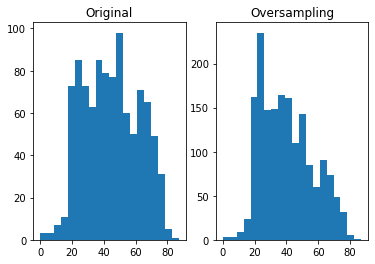

In [241]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_over['Age'], bins=20); ax2.set_title('Oversampling');

In [242]:
stats.describe(X_over['Age']), X_over['Age'].median()

(DescribeResult(nobs=1704, minmax=(0, 87), mean=40.17546948356807, variance=261.5481706543823, skewness=0.43555320538925785, kurtosis=-0.703465121694399),
 38.0)

In [243]:
y_over.value_counts()

1    852
0    852
Name: Survived, dtype: int64

### 3.1.2. SMOTE

Apart from these random sampling with replacement, another over-sampling method is the *Synthetic Minority Oversampling Technique (SMOTE)*, which generates, as the named proposes, synthetic samples. 

It works creating synthetic samples from the minor class instead of creating copies as before. It selects ta minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b [[1]](https://www.wiley.com/en-us/Imbalanced+Learning%3A+Foundations%2C+Algorithms%2C+and+Applications-p-9781118074626), [[7]](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/), [[8]](https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family#:~:text=The%20key%20difference%20between%20ADASYN,to%20compensate%20for%20the%20skewed), [[9]](https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide).

PS: SMOTE works in theory only with **numerical data**.

In [244]:
from imblearn.over_sampling import SMOTE

# for this, we need only numerical values, so we'll use only Age as predictor
X_num = np.asarray(X['Age']).reshape(-1,1)

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote.fit_resample(X_num, y)

In [245]:
X_smote.shape, y_smote.shape

((1704, 1), (1704,))

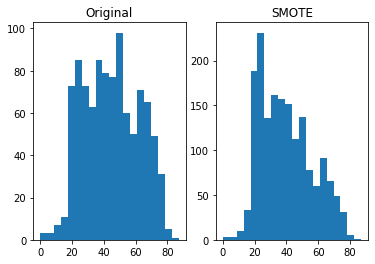

In [246]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_smote, bins=20); ax2.set_title('SMOTE');

In [247]:
stats.describe(X_smote), np.median(X_smote)

(DescribeResult(nobs=1704, minmax=(array([0]), array([87])), mean=array([39.5129108]), variance=array([266.47311566]), skewness=array([0.4651974]), kurtosis=array([-0.69021705])),
 37.0)

In [248]:
y_smote.value_counts()

1    852
0    852
Name: Survived, dtype: int64

### 3.1.3. Borderline-SMOTE

In Borderline-SMOTE only borderline instances are considered to be SMOTEd, where borderline instances are defined as instances that are  misclassified by knn, generating only synthetic that are *difficult* to classify [[1]](https://www.wiley.com/en-us/Imbalanced+Learning%3A+Foundations%2C+Algorithms%2C+and+Applications-p-9781118074626), [[4]](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/).

In [249]:
from imblearn.over_sampling import BorderlineSMOTE

# for this, we need only numerical values, so we'll use only Age as predictor
bord_smote = BorderlineSMOTE(sampling_strategy='minority', random_state=42)
X_bsmote, y_bsmote = bord_smote.fit_resample(X_num, y)

In [250]:
X_bsmote.shape, y_bsmote.shape

((1704, 1), (1704,))

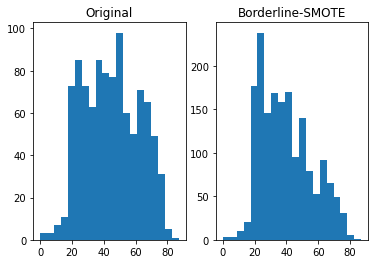

In [251]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_bsmote, bins=20); ax2.set_title('Borderline-SMOTE');

In [252]:
stats.describe(X_bsmote), np.median(X_bsmote)

(DescribeResult(nobs=1704, minmax=(array([0]), array([87])), mean=array([39.61678404]), variance=array([259.30050498]), skewness=array([0.48875465]), kurtosis=array([-0.63970249])),
 37.0)

In [253]:
y_smote.value_counts()

1    852
0    852
Name: Survived, dtype: int64

### 3.1.5. Borderline with SVM

Variant of SMOTE algorithm which use an SVM algorithm to detect sample to use for generating new synthetic samples [[10]](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SVMSMOTE.html).

As we can check above, Borderline-SMOTE with SVM does not result in a half-half number of samples.

In [254]:
from imblearn.over_sampling import SVMSMOTE

#for this, we need only numerical values, so we'll use only Age as predictor
bord_svm_smote = SVMSMOTE(sampling_strategy='minority', random_state=42)
X_bssmote, y_bssmote = bord_svm_smote.fit_resample(X_num, y)

In [255]:
X_bssmote.shape, y_bssmote.shape

((1382, 1), (1382,))

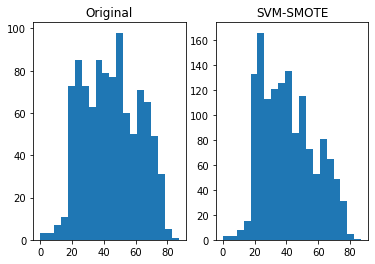

In [256]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_bssmote, bins=20); ax2.set_title('SVM-SMOTE');

In [257]:
stats.describe(X_bssmote), np.median(X_bssmote)

(DescribeResult(nobs=1382, minmax=(array([0]), array([87])), mean=array([41.20549928]), variance=array([276.54282274]), skewness=array([0.35533771]), kurtosis=array([-0.8014179])),
 40.0)

In [258]:
y_bssmote.value_counts()

0    852
1    530
Name: Survived, dtype: int64

### 3.1.6. SMOTENC

SMOTENC is a SMOTE variant for Nominal and Continuous, where one have a dataset with continuous and categorical features [[11]](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC).

In [259]:
from imblearn.over_sampling import SMOTENC

X_cat = X[['Sex','Age']]

smotenc = SMOTENC(sampling_strategy='minority', categorical_features=[X_cat.dtypes==object])
X_smotenc, y_smotenc = smotenc.fit_resample(X_cat, y)

In [260]:
X_smotenc.shape, y_smotenc.shape

((1704, 2), (1704,))

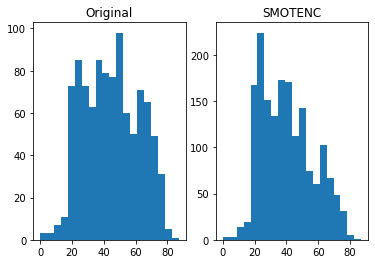

In [261]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_smotenc['Age'], bins=20); ax2.set_title('SMOTENC');

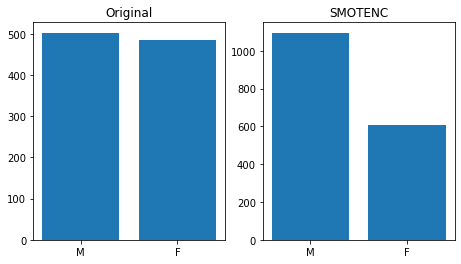

In [262]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(X['Sex'].unique(), X['Sex'].value_counts()); ax1.set_title('Original')
ax2.bar(X_smotenc['Sex'].unique(), X_smotenc['Sex'].value_counts()); ax2.set_title('SMOTENC')
plt.subplots_adjust(right=1.1);

In [263]:
X_smotenc['Sex'].value_counts()

M    1096
F     608
Name: Sex, dtype: int64

In [264]:
stats.describe(X_smotenc['Age']), np.median(X_smotenc['Age'])

(DescribeResult(nobs=1704, minmax=(0, 87), mean=40.21654929577465, variance=261.6447993598703, skewness=0.4177064417757139, kurtosis=-0.7039105582215766),
 38.0)

In [265]:
y_smotenc.value_counts()

1    852
0    852
Name: Survived, dtype: int64

### 3.1.7. ADASYN

ADASYN stands for ADAptive SYNthetic, and is based on the idea of adaptively generating minority data samples according to their distributions using KNN and Euclidean distance. The algorithm adaptively updates the distribution and there are no assumptions made for the underlying distribution of the data.

The key **difference** between ADASYN and SMOTE is that the *former* uses a *density distribution* as a criterion to automatically *decide the number of synthetic samples* that must be generated for each minority sample by adaptively changing the weights of the different minority samples to compensate for the skewed distributions. The *latter* generates the *same number of synthetic samples* for each original minority sample [[12]](https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family#:~:text=The%20key%20difference%20between%20ADASYN,to%20compensate%20for%20the%20skewed), [[13]](https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide).

PS: ADASYN also works only with **numerical data**.

In [266]:
from imblearn.over_sampling import ADASYN

# for this, we need only numerical values, so we'll use only Age as predictor
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = smote.fit_resample(X_num, y)

In [267]:
X_adasyn.shape, y_adasyn.shape

((1704, 1), (1704,))

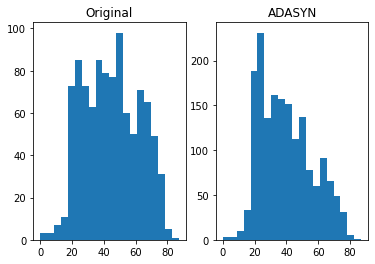

In [268]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_adasyn, bins=20); ax2.set_title('ADASYN');

In [269]:
stats.describe(X_adasyn), np.median(X_adasyn)

(DescribeResult(nobs=1704, minmax=(array([0]), array([87])), mean=array([39.5129108]), variance=array([266.47311566]), skewness=array([0.4651974]), kurtosis=array([-0.69021705])),
 37.0)

In [270]:
y_adasyn.value_counts()

1    852
0    852
Name: Survived, dtype: int64

## 3.2. Undersampling

Undersampling methods delete or select a subset of examples from the majority class. The techniques presented here will be [[4]](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/):

1. Random Undersampling
2. Condensed Nearest Neighbor Rule (CNN)
3. Near Miss Undersampling
4. Tomek Links Undersampling
5. Edited Nearest Neighbors Rule (ENN)
6. One-Sided Selection (OSS)
7. Neighborhood Cleaning Rule (NCR)

### 3.2.1. Random Undersampling

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset. 

Of course, this can be highly problematic, as the loss of such data can make the decision boundary between minority and majority instances harder to learn, resulting in a loss in classification performance [[6]](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/), [[14]](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html).

As we see from the shape below, the samples reduced from 852 to 274, difference of 578. But again the target is now evenly balanced.

In [271]:
from imblearn.under_sampling import RandomUnderSampler

# likewise over-sampling, here we have different strategies (check [4])
# but we'll use majority, which resmaples only the majority class
undersample = RandomUnderSampler(sampling_strategy='majority')

X_under, y_under = undersample.fit_resample(X, y)

In [272]:
X_under.shape, y_under.shape

((274, 7), (274,))

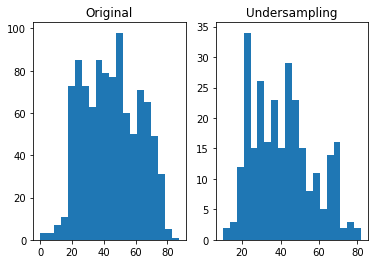

In [273]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_under['Age'], bins=20); ax2.set_title('Undersampling');

In [274]:
stats.describe(X_under['Age']), np.median(X_under['Age'])

(DescribeResult(nobs=274, minmax=(10, 82), mean=41.28832116788321, variance=255.31949680489825, skewness=0.3949657488839173, kurtosis=-0.6926464535289605),
 41.0)

In [275]:
y_under.value_counts()

1    137
0    137
Name: Survived, dtype: int64

### 3.2.2. Condensed Nearest Neighbour

CNN works like this: let D be the original training set of instances, and C be a set of instances containing all of the minority  lass examples and a randomly selected majority instance. CNN then classifies all instances in D by finding its nearest neighbor in C and adding it to C if it is misclassified, effectively eliminated in the resulting dataset C as any instance correctly classified by its nearest neighbors is not added to the dataset [[1]](https://www.wiley.com/en-us/Imbalanced+Learning%3A+Foundations%2C+Algorithms%2C+and+Applications-p-9781118074626).

PS: CNN works only with **numerical data!**

In [276]:
from imblearn.under_sampling import CondensedNearestNeighbour

# CNN also needs to only numerical data, so we again will use the predictor Age only
cnn = CondensedNearestNeighbour(sampling_strategy='majority', random_state=42)
X_cnn, y_cnn = cnn.fit_resample(X_num, y)

In [277]:
X_cnn.shape, y_cnn.shape

((385, 1), (385,))

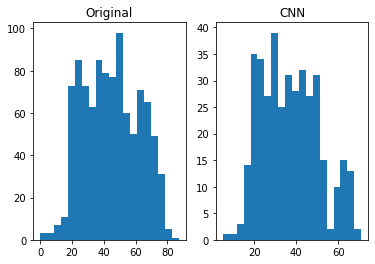

In [278]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_cnn, bins=20); ax2.set_title('CNN');

In [279]:
stats.describe(X_cnn), np.median(X_cnn)

(DescribeResult(nobs=385, minmax=(array([5]), array([71])), mean=array([37.18441558]), variance=array([189.32788149]), skewness=array([0.39329312]), kurtosis=array([-0.60944221])),
 36.0)

In [280]:
y_cnn.value_counts()

0    248
1    137
Name: Survived, dtype: int64

### 3.2.3. Near Miss

It's a family of methods that use KNN to select examples from the majority class [[4]](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/). 
- NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class;
- NearMiss-2 selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class;
- NearMiss-3 involves selecting a given number of majority class examples for each example in the minority class that are closest.

PS: Near Miss works only with **numerical data!**

In [281]:
from imblearn.under_sampling import NearMiss

# Near Miss needs numerical data as well!
near_miss = NearMiss(sampling_strategy='majority', version=1)
X_nm, y_nm = near_miss.fit_resample(X_num, y)

In [282]:
X_nm.shape, y_nm.shape

((274, 1), (274,))

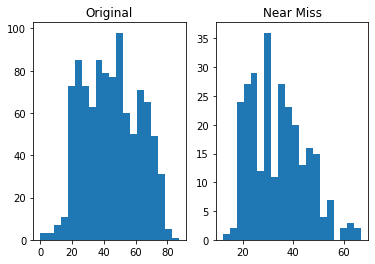

In [283]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_nm, bins=20); ax2.set_title('Near Miss');

In [284]:
stats.describe(X_nm), np.median(X_nm)

(DescribeResult(nobs=274, minmax=(array([12]), array([67])), mean=array([33.66058394]), variance=array([122.7378546]), skewness=array([0.51843252]), kurtosis=array([-0.30731601])),
 33.0)

In [285]:
y_nm.value_counts()

1    137
0    137
Name: Survived, dtype: int64

### 3.2.4. Tomek Links

Tomek Links is a technique that selects examples from the majority class to delete.

With $\delta$(a,b) be the distance between two instances a and b, they define a Tomek Link if [[1]](https://www.wiley.com/en-us/Imbalanced+Learning%3A+Foundations%2C+Algorithms%2C+and+Applications-p-9781118074626):
1. instance a nearest neighbour is b
2. instance b nearest neighbour is a
3. instances a and b belong to different classes.

As commented in [[15]](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/), because the procedure removes only Tomek Links, we would not expect the result to be balanced, but only less ambiguous along the class boundary.

PS: Tomek Links need **numerical data!**

In [286]:
from imblearn.under_sampling import TomekLinks

# lets use Age predictor again to demonstrate 
tomek_links = TomekLinks()
X_tl, y_tl = tomek_links.fit_resample(X_num, y)

In [287]:
X_tl.shape, y_tl.shape

((989, 1), (989,))

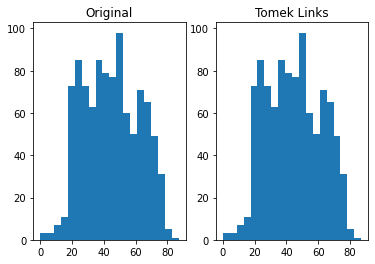

In [288]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_tl, bins=20); ax2.set_title('Tomek Links');

In [289]:
stats.describe(X_tl), np.median(X_tl)

(DescribeResult(nobs=989, minmax=(array([0]), array([87])), mean=array([44.57532861]), variance=array([297.05024091]), skewness=array([0.0678268]), kurtosis=array([-0.93700475])),
 44.0)

In [290]:
y_tl.value_counts() # equal to y

0    852
1    137
Name: Survived, dtype: int64

### 3.2.5. Edited Nearest Neighbours

ENN involves using k=3 nearest neighbors to locate those examples in a dataset that are misclassified and deleting them. This procedure can be repeated multiple times on the same dataset, better refining the selection of examples in the majority class [[4]](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/).

Like Tomek Links, is a deletion technique, where the procedure only removes noisy and ambiguous points along the class boundary.

PS: ENN demands **numerical data!**

In [291]:
from imblearn.under_sampling import EditedNearestNeighbours

# again using Age predictor
enn = EditedNearestNeighbours(n_neighbors=3)
X_enn, y_enn = enn.fit_resample(X_num, y)

In [292]:
X_enn.shape, y_enn.shape

((809, 1), (809,))

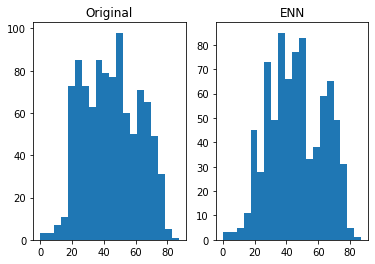

In [293]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_enn, bins=20); ax2.set_title('ENN');

In [294]:
stats.describe(X_enn), np.median(X_enn)

(DescribeResult(nobs=809, minmax=(array([0]), array([87])), mean=array([46.27812114]), variance=array([292.198543]), skewness=array([-0.0078161]), kurtosis=array([-0.82391767])),
 45.0)

In [295]:
y_enn.value_counts()

0    672
1    137
Name: Survived, dtype: int64

### 3.2.6. One-Sided Selection

OSS combines Tomek Links and CNN, the first used to remove noisy examples, and the last to remove redundant examples [[4]](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/).

PS: OSS demands **numerical data!**

In [296]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection(sampling_strategy='majority', n_neighbors=3, random_state=42)
X_oss, y_oss = oss.fit_resample(X_num, y)

In [297]:
X_oss.shape, y_oss.shape

((989, 1), (989,))

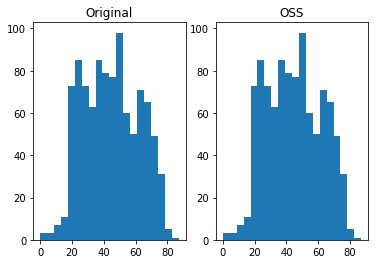

In [298]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_oss, bins=20); ax2.set_title('OSS');

In [299]:
stats.describe(X_oss), np.median(X_oss)

(DescribeResult(nobs=989, minmax=(array([0]), array([87])), mean=array([44.57532861]), variance=array([297.05024091]), skewness=array([0.0678268]), kurtosis=array([-0.93700475])),
 44.0)

In [300]:
y_oss.value_counts()

0    852
1    137
Name: Survived, dtype: int64

### 3.2.7. Neighborhood Cleaning Rule

In NCR, for each instance a in the dataset, its three nearest neighbors are computed. If a is a majority class instance and is misclassified by its three nearest neighbors, then a is removed from the dataset. Alternatively, if a is a minority class instance and is misclassified by its three nearest neighbors, then the majority class instances among a’s neighbors are removed [[1]](https://www.wiley.com/en-us/Imbalanced+Learning%3A+Foundations%2C+Algorithms%2C+and+Applications-p-9781118074626).

PS: NCR needs **numerical data!**

In [301]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
X_ncr, y_ncr = ncr.fit_resample(X_num, y)

In [302]:
X_ncr.shape, y_ncr.shape

((831, 1), (831,))

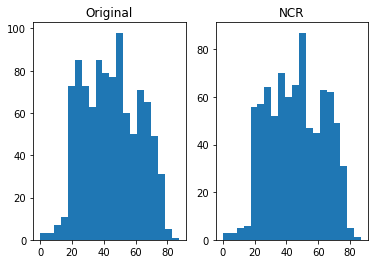

In [303]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_ncr, bins=20); ax2.set_title('NCR');

In [304]:
stats.describe(X_ncr), np.median(X_ncr)

(DescribeResult(nobs=831, minmax=(array([0]), array([87])), mean=array([45.97472924]), variance=array([301.53068592]), skewness=array([-0.00889138]), kurtosis=array([-0.9373357])),
 46.0)

In [305]:
y_ncr.value_counts()

0    694
1    137
Name: Survived, dtype: int64

## 3.3. Combining techniques

Combinig techniques can result in better performance. So let's track some possibilities

### 3.3.1. Random Over and Undersampling

Here we can combine both random oversampling and undersampling. So let's check how it's done:

In [306]:
# firstly, since we have 6:1 ratio in the target, lets over-sample it with a strategy of 0.6
over = RandomOverSampler(sampling_strategy=0.4)
X_over, y_over = over.fit_resample(X, y)

In [307]:
X_over.shape, y_over.shape, y_over.value_counts()

((1192, 7),
 (1192,),
 0    852
 1    340
 Name: Survived, dtype: int64)

In [308]:
# now we under-sample with strategy of 0.8, reaching a similar size of dataset
under = RandomUnderSampler(sampling_strategy=0.8)
X_under, y_under = under.fit_resample(X_over, y_over)

In [309]:
X_under.shape, y_under.shape, y_under.value_counts()

((765, 7),
 (765,),
 0    425
 1    340
 Name: Survived, dtype: int64)

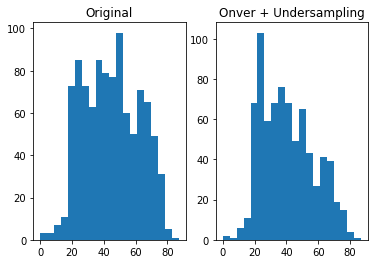

In [310]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_under['Age'], bins=20); ax2.set_title('Onver + Undersampling');

In [311]:
stats.describe(X_under['Age']), np.median(X_under['Age'])

(DescribeResult(nobs=765, minmax=(0, 87), mean=40.67712418300653, variance=271.79482941518665, skewness=0.3885841141733488, kurtosis=-0.7110854303560519),
 38.0)

### 3.3.2. SMOTE + Tomek Links

In [312]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek()
X_st, y_st = smote_tomek.fit_resample(X_num, y)

In [313]:
X_st.shape, y_st.shape

((1704, 1), (1704,))

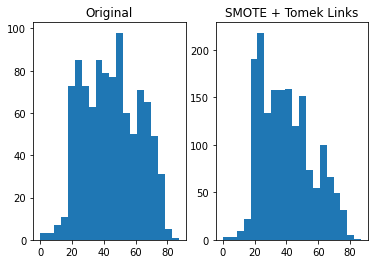

In [314]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_st, bins=20); ax2.set_title('SMOTE + Tomek Links');

In [315]:
stats.describe(X_st), np.median(X_st)

(DescribeResult(nobs=1704, minmax=(array([0]), array([87])), mean=array([39.97828638]), variance=array([262.60140728]), skewness=array([0.4269017]), kurtosis=array([-0.6982447])),
 38.0)

In [316]:
y_st.value_counts()

1    852
0    852
Name: Survived, dtype: int64

### 3.3.3. SMOTE + ENN

In [317]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN()
X_se, y_se = smote_enn.fit_resample(X_num, y)

In [318]:
X_se.shape, y_se.shape

((528, 1), (528,))

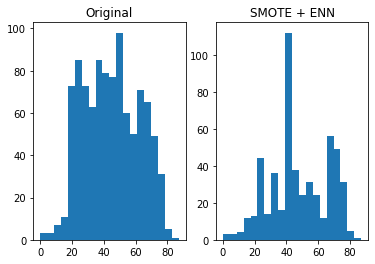

In [319]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(X['Age'], bins=20); ax1.set_title('Original')
ax2.hist(X_se, bins=20); ax2.set_title('SMOTE + ENN');

In [320]:
stats.describe(X_se), np.median(X_se)

(DescribeResult(nobs=528, minmax=(array([0]), array([87])), mean=array([47.6344697]), variance=array([332.11850598]), skewness=array([-0.06244453]), kurtosis=array([-0.86263091])),
 44.0)

In [321]:
y_se.value_counts()

0    319
1    209
Name: Survived, dtype: int64